In [1]:
pip install tabulate


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import tabulate

from IPython.display import display
from sklearn.preprocessing import LabelEncoder
from sklearn import cluster
from tensorflow import keras
from IPython.core.formatters import format_display_data
from matplotlib import pyplot as plt
import seaborn as sns

mpl.rcParams['figure.dpi'] = 200
mpl.rcParams['figure.facecolor'] = '1'

In [4]:
rowNum = 2836
rowNumTest = 400
df = pd.read_csv(f'./common_resultStaticsDf_process_more_{rowNum}_list_withZero_head.csv')

dfTest = pd.read_csv(f'./common_resultStaticsDf_process_more_{rowNumTest}_list_relustTest_8000.csv')

In [6]:
max_review_op_length = df.shape[1] - 2
newIndex = np.arange(0,max_review_op_length)
max_review_length = df.shape[1] - 1
max_review_length_last = max_review_length - 1
newIndexDataArr = np.append(newIndex, max_review_length_last)

In [8]:
value_tactic = len(df['strategyOpponent'].unique())
dataset = df.values

X = dataset[:,newIndexDataArr].astype(float)
Y = dataset[:,max_review_length]

print('X test: ', X)
print('Y test: ', Y)

X test:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
Y test:  ['MiddleFieldAttack' 'MiddleFieldAttack' 'SaveNearGate' ...
 'MiddleFieldAttack' 'MiddleFieldAttack' 'MiddleFieldAttack']


In [10]:
datasetTest = dfTest.values
XTest = datasetTest[:,newIndexDataArr].astype(float)
YTest = datasetTest[:,max_review_length]

In [11]:
encoder = LabelEncoder()
Y_e = encoder.fit_transform(Y)
Y_d = keras.utils.to_categorical(Y_e)

Y_e_test = encoder.fit_transform(YTest)
Y_d_test = keras.utils.to_categorical(Y_e_test)

In [12]:
from sklearn.preprocessing import StandardScaler

X=pd.DataFrame(StandardScaler().fit_transform(X)).to_numpy()

In [13]:
import seaborn as sns
import warnings
from matplotlib.colors import ListedColormap

PALETTE = sns.color_palette('deep', n_colors=10)
CMAP = ListedColormap(PALETTE.as_hex())

def plot_iris_2d(x, y, title, c_in = Y_e, xlabel="1st eigenvector", ylabel="2nd eigenvector"):
    sns.set_style("darkgrid")
    
    plt.scatter(x, y,
        c=c_in,
        cmap=CMAP,
        s=2)
    
    plt.title(title, fontsize=20, y=1.03)

    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)

In [14]:
def get_columns_with_pref(prefix, num_components):
    COLUMNS = []
    for i in range(num_components):
        COLUMNS.append(f'{prefix}{i}')
    return COLUMNS

In [16]:
from sklearn.decomposition import PCA

num_components = 2

pca = PCA(n_components=num_components)
points_pca = pca.fit_transform(X)

<Axes: >

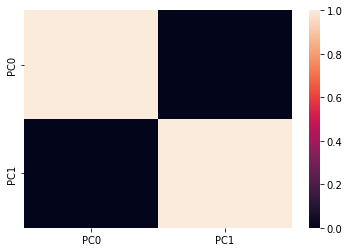

In [17]:
data_pca = pd.DataFrame(points_pca,columns=get_columns_with_pref('PC', num_components))
sns.heatmap(data_pca.corr())

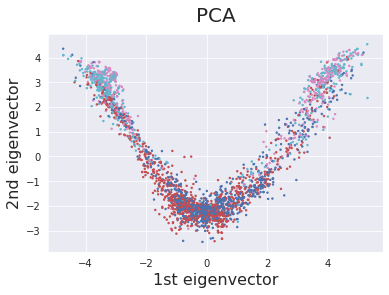

In [18]:
plot_iris_2d(
    x = data_pca['PC0'],
    y = data_pca['PC1'],
    title = 'PCA')
plt.savefig('./img' + '_PCA_' + '_' + 'resultImg_.png', format='png', dpi=600)

In [19]:
from sklearn.decomposition import PCA

num_components = 2

pca = PCA(n_components=num_components)
points_pca = pca.fit_transform(X)

In [20]:
from sklearn.manifold import TSNE

RANDOM_STATE = 42
tsne_n_components = 2
history_tsne = []

with warnings.catch_warnings():
        #tsne = TSNE(n_components=tsne_n_components, perplexity=40, n_iter=2000, random_state=RANDOM_STATE, method='exact')
        #tsne = TSNE(n_components=tsne_n_components, n_iter=5000, random_state=RANDOM_STATE, method='exact')
        tsne = TSNE(n_components=tsne_n_components, perplexity=40, n_iter=2000, random_state=RANDOM_STATE, method='barnes_hut')
        points = tsne.fit_transform(X)
history_tsne.append(points)

# for perplex in range(10, 100, 10):
#     with warnings.catch_warnings():
#         #tsne = TSNE(n_components=tsne_n_components, n_iter=5000, random_state=RANDOM_STATE, method='exact')
#         tsne = TSNE(n_components=tsne_n_components, perplexity=perplex, n_iter=2000, random_state=RANDOM_STATE, method='barnes_hut')
#         points = tsne.fit_transform(X)
#     history_tsne.append(points)

In [23]:
pd_tsneArray = []
for item in history_tsne:
    pd_tsneArray.append(pd.DataFrame(item ,columns=get_columns_with_pref('cl', tsne_n_components)))

<Axes: >

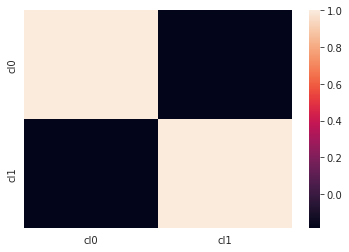

In [24]:
data_tsne = pd.DataFrame(points ,columns=get_columns_with_pref('cl', tsne_n_components))
sns.heatmap(data_tsne.corr())

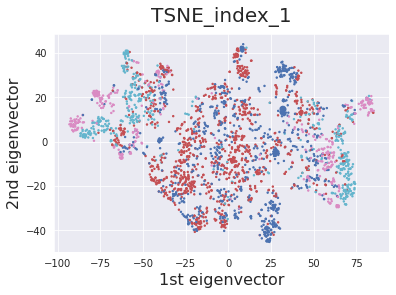

In [26]:
## 2d

plot_num = 1
# axes[0, 0]
for item in pd_tsneArray:
    plt.subplots(1, 1)
    plot_iris_2d(
        x = item['cl0'],
        y = item['cl1'],
        title = 'TSNE_index_' + str(plot_num))
    plot_num += 1
    #plt.savefig('./img' + str(plot_num) + '_t-sne_' + '_' + 'resultImg_.png', format='png', dpi=600)

In [27]:
# 3d - using with tsne_n_components = 3

In [28]:
from mpl_toolkits.mplot3d import Axes3D

def plot_iris_3d(x, y, z, title, c_in = Y_e):
    sns.set_style('whitegrid')
    
    fig = plt.figure(1, figsize=(8, 6))
    ax = Axes3D(fig, elev=-150, azim=110)
    
    ax.scatter(x, y, z,
               c=c_in,
               cmap=CMAP,
               s=2)
    
    ax.set_title(title, fontsize=20, y=1.03)
    
    fsize = 14
    ax.set_xlabel("1st eigenvector", fontsize=fsize)
    ax.set_ylabel("2nd eigenvector", fontsize=fsize)
    ax.set_zlabel("3rd eigenvector", fontsize=fsize)
    
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])

In [29]:
## 3d

plot_num = 0
# axes[0, 0]
item = pd_tsneArray[plot_num]
plot_iris_3d(
x = item['cl0'],
y = item['cl1'],
z = item['cl2'],
title = 'TSNE')
plt.savefig('./img/' + str(plot_num) + '_t-sne_3d_' + '_' + 'resultImg_.png', format='png', dpi=600)  

KeyError: KeyError: 'cl2'

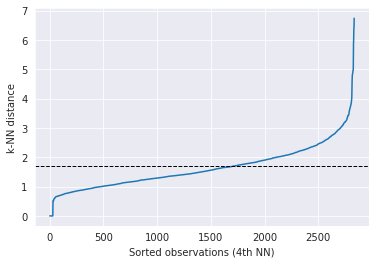

In [33]:
# Search knee in data for set DBScan prams

import numpy as np
from sklearn.neighbors import NearestNeighbors
# n_neighbors = 5 as kneighbors function returns distance of point to itself (i.e. first column will be zeros) 
n_neighbors = 5
pointsNN = history_tsne[0]
nbrs = NearestNeighbors(n_neighbors=n_neighbors).fit(pointsNN)
# Find the k-neighbors of a point
neigh_dist, neigh_ind = nbrs.kneighbors(pointsNN)
# sort the neighbor distances (lengths to points) in ascending order
# axis = 0 represents sort along first axis i.e. sort along row
sort_neigh_dist = np.sort(neigh_dist, axis=0)

import matplotlib.pyplot as plt
k_dist = sort_neigh_dist[:, n_neighbors-1]
plt.plot(k_dist)
plt.axhline(y=1.7, linewidth=1, linestyle='dashed', color='k')
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()

In [35]:
pointsCalc = history_tsne[0]

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/cluster/_optics.py:932: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

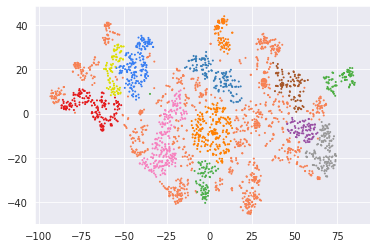

In [36]:
# Get clustering 

import warnings
from itertools import cycle, islice

#dbscan = cluster.DBSCAN(eps=3.3, min_samples=5)
dbscan = cluster.OPTICS(min_samples=5,
        xi=0.03,
        min_cluster_size=0.03,)

with warnings.catch_warnings():
    warnings.filterwarnings(
        "ignore",
        message="the number of connected components of the "
        + "connectivity matrix is [0-9]{1,2}"
        + " > 1. Completing it to avoid stopping the tree early.",
        category=UserWarning,
    )
    warnings.filterwarnings(
        "ignore",
        message="Graph is not fully connected, spectral embedding"
        + " may not work as expected.",
        category=UserWarning,
    )
    dbscan.fit(pointsCalc)

if hasattr(dbscan, "labels_"):
    y_pred = dbscan.labels_.astype(int)
else:
    y_pred = dbscan.predict(pointsCalc)

colors = np.array(
    list(
        islice(
            cycle(
                [
                    "#377eb8",
                    "#ff7f00",
                    "#4daf4a",
                    "#f781bf",
                    "#a65628",
                    "#984ea3",
                    "#999999",
                    "#e41a1c",
                    "#dede00",
                    "#377ef3",
                    "#ff7f11",
                    "#4daf43",
                    "#f78154",
                    "#a65676",
                    "#984e3a",
                    "#999944",
                    "#e41ac8",
                    "#dede39",
                    "#dede11",
                ]
            ),
            int(max(y_pred) + 1),
        )
    )
)

display(np.unique(dbscan.labels_))
plt.scatter(pointsCalc[:, 0], pointsCalc[:, 1], s=1, color=colors[y_pred])
#plt.xticks(())
#plt.yticks(())

#plt.show()

In [37]:
data_tsne['strategy'] = df['strategyOpponent']
display(data_tsne['strategy'].value_counts())

MiddleFieldSave      1070
MiddleFieldAttack     882
SaveNearGate          482
NearGateAttack        402
Name: strategy, dtype: int64

In [38]:
#df_process = pd.DataFrame(data_tsne)
df_process = pd.DataFrame(pd_tsneArray[0])
#df_process['strategy'] = df['strategyOpponent']#dbscan.labels_
df_process['strategy'] = dbscan.labels_
display(df_process['strategy'].value_counts())
df_process = df_process.drop(df_process[df_process['strategy'] == - 1].index)
display(df_process['strategy'].value_counts())

-1     1035
 3      246
 1      227
 7      195
 9      182
 6      154
 0      144
 4      108
 11      99
 10      97
 8       91
 12      87
 2       86
 5       85
Name: strategy, dtype: int64

3     246
1     227
7     195
9     182
6     154
0     144
4     108
11     99
10     97
8      91
12     87
2      86
5      85
Name: strategy, dtype: int64

In [39]:
display(len(df_process.value_counts(df_process['strategy'])))
df_process.value_counts(df_process['strategy'])

13

strategy
3 246
1 227
7 195
9 182
6 154
0 144
4 108
11 99
10 97
8 91
12 87
2 86
5 85
dtype: int64

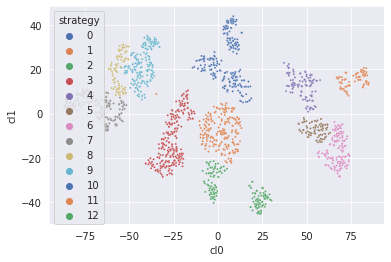

In [41]:
# View clastering

sns.scatterplot(data=df_process, x="cl0", y="cl1", hue="strategy", s=4, palette='deep')
plt.savefig('./img/' + str(plot_num) + '_optics_' + '_' + 'resultImg_.png', format='png', dpi=600)

In [42]:
plot_iris_3d(
x = df_process['cl0'],
y = df_process['cl1'],
z = df_process['cl2'],
title = 'TSNE', c_in=df_process['strategy'])
plt.savefig('./img/' + str(plot_num) + '_dbscan_3d_' + '_' + 'resultImg_.png', format='png', dpi=600)

KeyError: KeyError: 'cl2'

In [50]:
# Обучение без учителя

from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(df_process, df_process['strategy'], test_size=0.1, random_state=42)

In [56]:
# Обучение с учителем и с сжатием данных

from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(data_tsne, data_tsne['strategy'], test_size=0.1, random_state=42)

In [57]:
# Обучение без учителя

x_train = x_train.drop('strategy', axis=1)
x_val = x_val.drop('strategy', axis=1)

In [58]:
Y_e = encoder.fit_transform(y_train.values)
Y_d = keras.utils.to_categorical(Y_e)

Y_e_test = encoder.fit_transform(y_val.values)
Y_d_test = keras.utils.to_categorical(Y_e_test)

X = x_train.values
XTest = x_val.values

In [59]:
Y_d

array([[0., 0., 1., 0.],
 [1., 0., 0., 0.],
 [0., 1., 0., 0.],
 ...,
 [1., 0., 0., 0.],
 [0., 0., 1., 0.],
 [0., 0., 1., 0.]], dtype=float32)

In [68]:
print(Y_d_test.shape[1])

4


In [69]:
value_tactic = Y_d_test.shape[1]
model = keras.models.Sequential([
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(value_tactic, activation='sigmoid')
])
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X, Y_d, epochs=5, batch_size=10, validation_split=0.1, verbose=1)
score = model.evaluate(XTest, Y_d_test)

Epoch 1/5
230/230 [==============================] - 1s 2ms/step - loss: 3.0029 - accuracy: 0.3415 - val_loss: 1.6572 - val_accuracy: 0.3281
Epoch 2/5
230/230 [==============================] - 0s 2ms/step - loss: 1.4713 - accuracy: 0.4225 - val_loss: 1.3246 - val_accuracy: 0.4102
Epoch 3/5
230/230 [==============================] - 0s 2ms/step - loss: 1.1770 - accuracy: 0.4556 - val_loss: 1.1567 - val_accuracy: 0.4219
Epoch 4/5
230/230 [==============================] - 0s 2ms/step - loss: 1.1012 - accuracy: 0.4717 - val_loss: 1.0959 - val_accuracy: 0.4531
Epoch 5/5
9/9 [==============================] - 0s 1ms/step - loss: 1.0834 - accuracy: 0.4085


In [70]:
#score
print("Точность обучения: {0:.2%}".format(score[1]))

Точность обучения: 40.85%


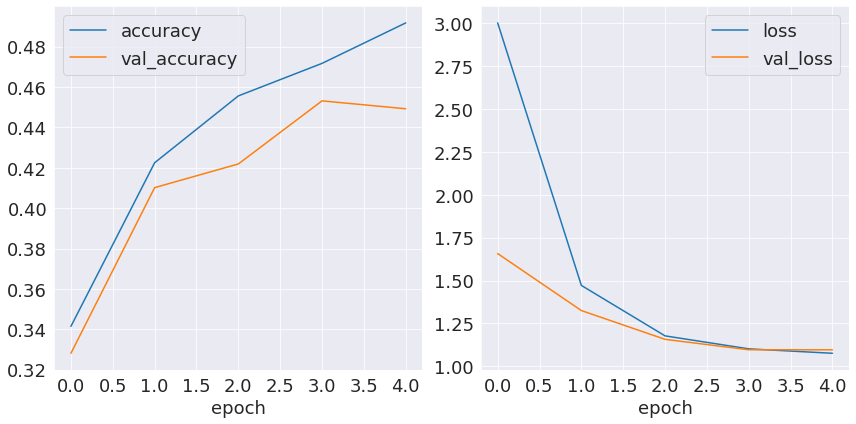

In [71]:
def plot_history(history, ax1=None, ax2=None, nameSave = None):
    df_h = pd.DataFrame(history.history)
    if ax1 is None:
        _, [ax1, ax2] = plt.subplots(1, 2, figsize=(12, 6))
    df_h[['accuracy', 'val_accuracy']].plot(ax=ax1, fontsize=18)
    df_h[['loss', 'val_loss']].plot(ax=ax2, fontsize=18)
    for ax in [ax1, ax2]:
        ax.legend(fontsize=18)
        ax.set_xlabel('epoch', fontsize=18)
        #ax.rc(fontsize=20)
        ax.grid(0.75)
        ax.set_axisbelow(True)

    if nameSave:
        plt.savefig(nameSave, format='png', dpi=600)

plot_history(history)
plt.gcf().tight_layout()
#plt.savefig('h0.png')

In [73]:
from sklearn.model_selection import KFold

In [76]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

histories = []
scores = []
neyron = 15#max_review_op_length+1
#neyron = max_review_op_length+1

for train_index, test_index in kf.split(X, Y_d):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y_d[train_index], Y_d[test_index]
    model = keras.models.Sequential([
        keras.layers.Dense(neyron, activation='relu'),
        keras.layers.Dropout(0.2, noise_shape=None, seed=None),
        keras.layers.Dense(neyron * 2, activation='relu'),
        keras.layers.Dropout(0.15, noise_shape=None, seed=None),
        keras.layers.Dense(neyron / 3, activation='relu'),
        keras.layers.Dense(value_tactic, activation='softmax')
    ])
    model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, Y_train, epochs=500, batch_size=1000, verbose=1, validation_data=(X_test, Y_test))
    score = model.evaluate(XTest, Y_d_test, verbose=0)
    #print("Точность обучения: {0:.2%}".format(score[1]))
    scores.append(score)
    histories.append(history)

Epoch 1/500
3/3 [==============================] - 1s 236ms/step - loss: 4.1434 - accuracy: 0.3337 - val_loss: 3.1078 - val_accuracy: 0.2955
Epoch 2/500
3/3 [==============================] - 0s 21ms/step - loss: 3.6082 - accuracy: 0.3229 - val_loss: 2.6854 - val_accuracy: 0.2818
Epoch 3/500
3/3 [==============================] - 0s 19ms/step - loss: 3.3143 - accuracy: 0.3097 - val_loss: 2.3490 - val_accuracy: 0.2603
Epoch 4/500
3/3 [==============================] - 0s 19ms/step - loss: 2.8095 - accuracy: 0.3361 - val_loss: 2.0983 - val_accuracy: 0.2348
Epoch 5/500
3/3 [==============================] - 0s 21ms/step - loss: 2.5319 - accuracy: 0.3008 - val_loss: 1.9089 - val_accuracy: 0.2368
Epoch 6/500
3/3 [==============================] - 0s 18ms/step - loss: 2.3102 - accuracy: 0.3155 - val_loss: 1.7547 - val_accuracy: 0.2544
Epoch 7/500
3/3 [==============================] - 0s 25ms/step - loss: 2.2409 - accuracy: 0.2979 - val_loss: 1.6313 - val_accuracy: 0.2564
Epoch 8/500
3/3 [==

In [77]:
for scoreItem in scores:
    print("Точность обучения: {0:.2%}".format(scoreItem[1]))
    #print(scoreItem)

Точность обучения: 39.79%
Точность обучения: 50.35%
Точность обучения: 43.31%
Точность обучения: 38.73%
Точность обучения: 36.97%


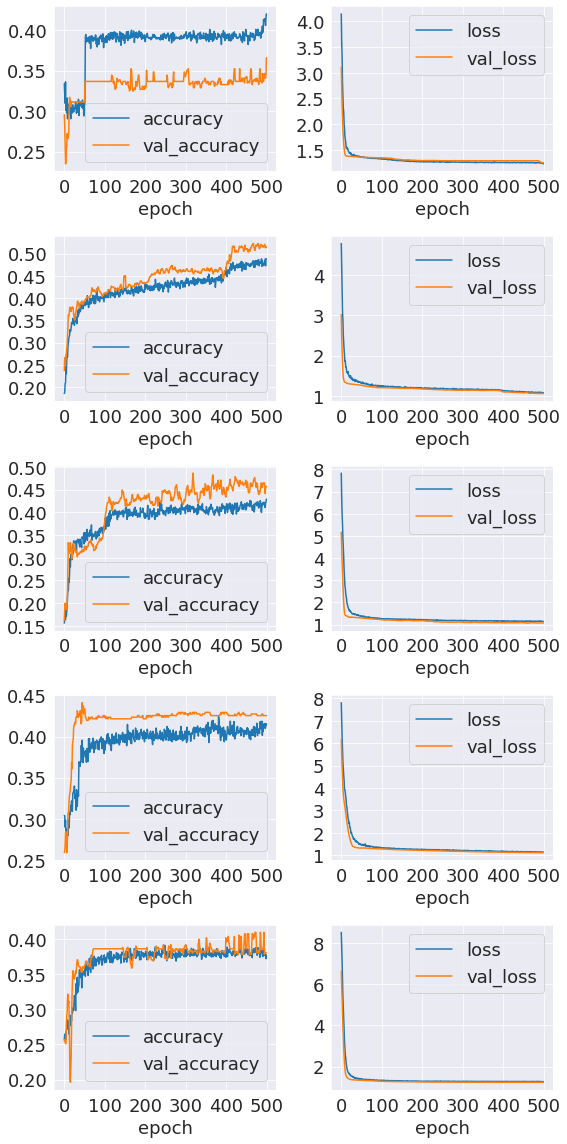

In [78]:
# Проверка результата на тестовых данных. Сжатие\нет, С_учителем\Без_учителя зависит от разметки данных и преобразования

fig, axes = plt.subplots(5, 2, figsize=(8, 16))

indexT = 1

for history, [ax1, ax2] in zip(histories, axes):
    plot_history(history, ax1, ax2)
    #plot_history(history, ax1, ax2, './img/' + str(plot_num) + '_model_2_' + '_' + str(indexT) + '_resultImg_.png')
    #plt.savefig('./img/' + str(plot_num) + '_model_2_' + '_' + str(indexT) + '_resultImg_.png', format='png', dpi=600)
    indexT += 1
    
fig.tight_layout()